In [1]:
import pink
import tools
import numpy as np

print(pink.__version__)

2.4 revision 5408386


In [2]:
import cv2
import glob
import numpy as np

#images = np.array([cv2.imread(file) for file in glob.glob('../data/pink/efigi-1.6/efigi-1.6/png/PGC00356*.png')])
images = np.array([cv2.imread(file) for file in glob.glob('../data/pink/efigi-1.6/efigi-1.6/png/PGC0057338.png')])
images = np.array([cv2.resize(images[i], dsize=(4, 4), interpolation=cv2.INTER_CUBIC)
         for i in range(len(images))])
images = images.swapaxes(1, 3).astype(np.float32)
images = (images - np.amin(images)) / (np.amax(images) - np.amin(images))

print('shape:     ', images.shape)
print('min value: ', np.amin(images))
print('max value: ', np.amax(images))

images = np.zeros((1,3,4,4)).astype(np.float32)

shape:      (1, 3, 4, 4)
min value:  0.0
max value:  1.0


In [3]:
r = images.shape[2] / 2
r2 = r * r

for i in range(images.shape[2]):
    for j in range(images.shape[3]):
        if ((i - r)*(i - r) + (j - r)*(j - r) >= r2):
            images[:,:,i,j] = 0.0
        else:
            images[:,:,i,j] = 1.0

print(images.dtype)

float32


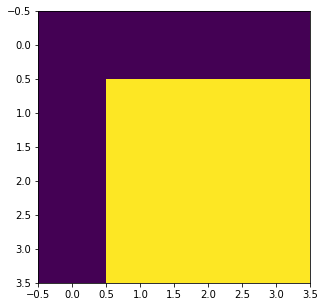

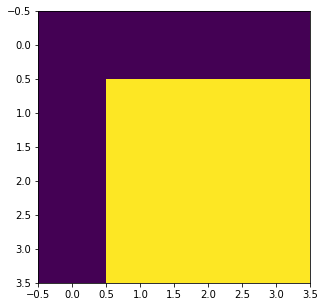

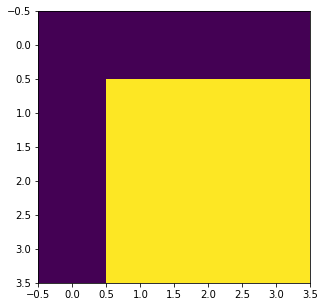

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

for i in range(images.shape[1]):
    plt.figure(figsize=(5,5))
    plt.imshow(images[0,i,:,:])

In [5]:
import math

som_dim = 2
neuron_dim = images.shape[2]
euclid_dim = images.shape[2]
#neuron_dim = int(images.shape[2] / math.sqrt(2.0) * 2.0)
#euclid_dim = int(images.shape[2] * math.sqrt(2.0) / 2.0)
number_of_channnels = images.shape[1]

print("neuron_dim = ", neuron_dim)
print("euclid_dim = ", euclid_dim)

np_som = np.zeros((som_dim, som_dim, number_of_channnels, neuron_dim, neuron_dim)).astype(np.float32)
#np_som = np.random.rand(som_dim, som_dim, number_of_channnels, neuron_dim, neuron_dim).astype(np.float32)
som = pink.SOM(np_som, neuron_layout="cartesian-3d")

trainer = pink.Trainer(som,
                       number_of_rotations=1,
                       use_flip=False,
                       euclidean_distance_dim=euclid_dim,
                       use_gpu=False)

neuron_dim =  4
euclid_dim =  4


In [6]:
from tqdm.notebook import trange

#for i in trange(len(images)):
for i in trange(1):
    trainer(pink.Data(images[i], layout="cartesian-3d"))

In [7]:
trainer.update_som()
np_som = np.array(som, copy=True)
print(np_som.shape)

(2, 2, 3, 4, 4)


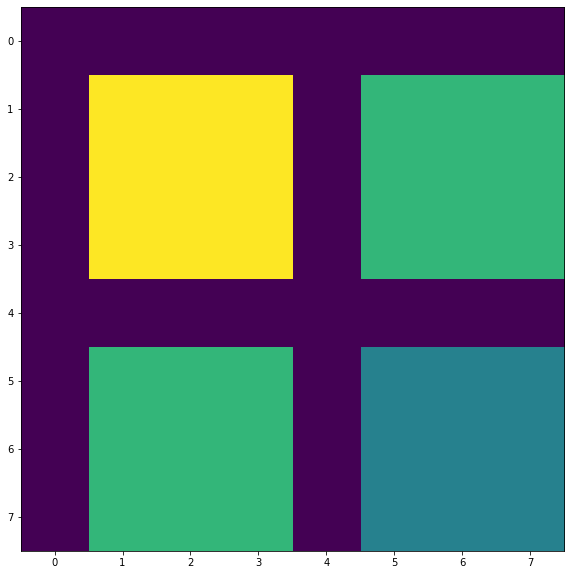

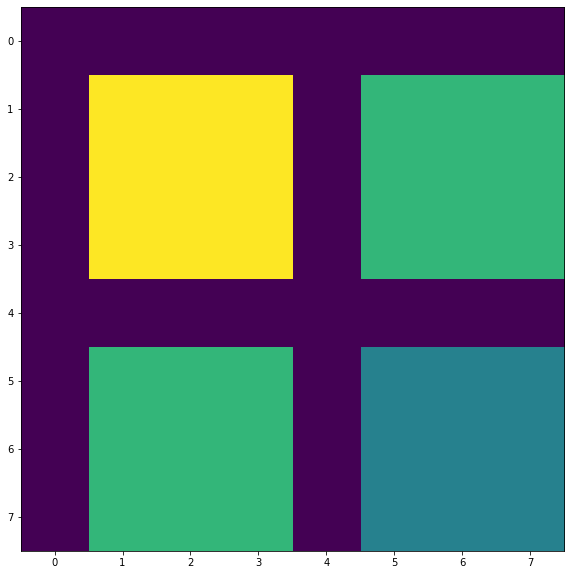

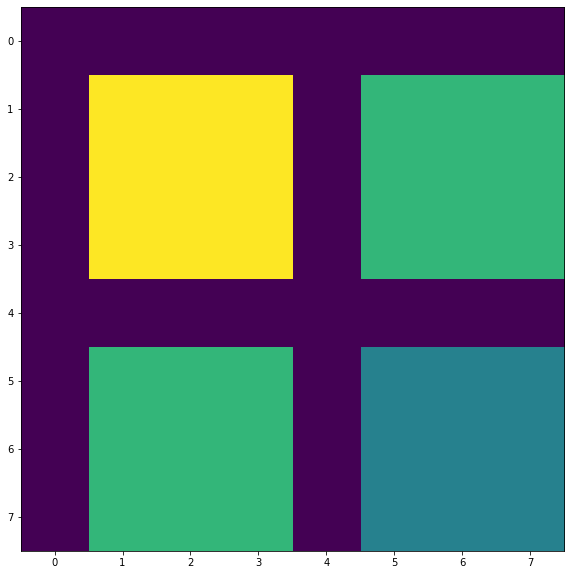

In [8]:
for i in range(images.shape[1]):
    plt.figure(figsize=(10,10))
    plt.imshow(np_som[:,:,i,:,:].swapaxes(1, 2).reshape((som_dim * neuron_dim, som_dim * neuron_dim)))